In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Basisstijl voor plots
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["axes.grid"] = True

# ============================================================================
# STAP 1: DATA INLADEN EN EERSTE VERKENNING
# ============================================================================
print("="*80)
print("STAP 1: DATA INLADEN EN EERSTE VERKENNING")
print("="*80)

# Laad de dataset
df = pd.read_csv("ML-sleep_health_lifestyle_dataset.csv")

print(f"\nDataset geladen met {df.shape[0]} rijen en {df.shape[1]} kolommen")
print("\nEerste 5 rijen:")
display(df.head())

STAP 1: DATA INLADEN EN EERSTE VERKENNING

Dataset geladen met 1528 rijen en 13 kolommen

Eerste 5 rijen:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [72]:
# ============================================================================
# STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE
# ============================================================================
print("\n" + "="*80)
print("STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE")
print("="*80)

print("\nInformatie over datatypes en geheugengebruik:")
df.info()

print("\n" + "-"*80)
print("CONTROLE OP ONTBREKENDE WAARDEN")
print("-"*80)
missing_values = df.isnull().sum()
missing_pct = 100 * df.isnull().sum() / len(df)
missing_table = pd.DataFrame({
    'Aantal Missing': missing_values,
    'Percentage': missing_pct
})
print(missing_table[missing_table['Aantal Missing'] > 0])

if missing_table['Aantal Missing'].sum() == 0:
    print("\n✓ Geen ontbrekende waarden gevonden in de dataset")
    print("Dit is gunstig voor modelontwikkeling omdat we geen imputatiestrategieën nodig hebben.")
else:
    print("\n⚠ Er zijn ontbrekende waarden die behandeld moeten worden")

print("\n" + "-"*80)
print("BESCHRIJVENDE STATISTIEKEN - NUMERIEKE VARIABELEN")
print("-"*80)
display(df.describe())





STAP 2: DATA INSPECTIE EN KWALITEITSCONTROLE

Informatie over datatypes en geheugengebruik:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1528 non-null   int64  
 1   Gender                   1528 non-null   object 
 2   Age                      1528 non-null   int64  
 3   Occupation               1528 non-null   object 
 4   Sleep Duration           1528 non-null   float64
 5   Quality of Sleep         1528 non-null   int64  
 6   Physical Activity Level  1528 non-null   int64  
 7   Stress Level             1528 non-null   int64  
 8   BMI Category             1528 non-null   object 
 9   Blood Pressure           1528 non-null   object 
 10  Heart Rate               1528 non-null   int64  
 11  Daily Steps              1528 non-null   int64  
 12  Sleep Disorder           661 non-null  

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,187.505236,42.153141,7.146440,7.268325,58.430628,5.387435,70.212696,6926.494764
std,107.381064,8.669896,0.794124,1.366161,20.622065,1.898995,4.518888,1643.803797
min,1.000000,26.000000,5.616234,3.000000,25.000000,2.000000,62.000000,2583.000000
25%,93.750000,35.000000,6.406521,6.000000,42.000000,4.000000,67.000000,5764.750000
50%,187.000000,42.000000,7.200000,7.000000,59.000000,5.000000,70.000000,6931.500000
75%,279.000000,49.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,61.000000,8.795048,10.000000,95.000000,9.000000,89.000000,10990.000000



STAP 3: TARGET VARIABELE ANALYSE

De target variabele 'Sleep Disorder' vormt de basis voor ons classificatieprobleem.
We onderzoeken de verdeling van klassen om te bepalen of we te maken hebben met
class imbalance en of dit speciale aandacht vereist tijdens modeltraining.

Verdeling van Sleep Disorder:
Sleep Disorder
None           867
Insomnia       348
Sleep Apnea    313
Name: count, dtype: int64

Percentages:
Sleep Disorder
None           56.740838
Insomnia       22.774869
Sleep Apnea    20.484293
Name: proportion, dtype: float64


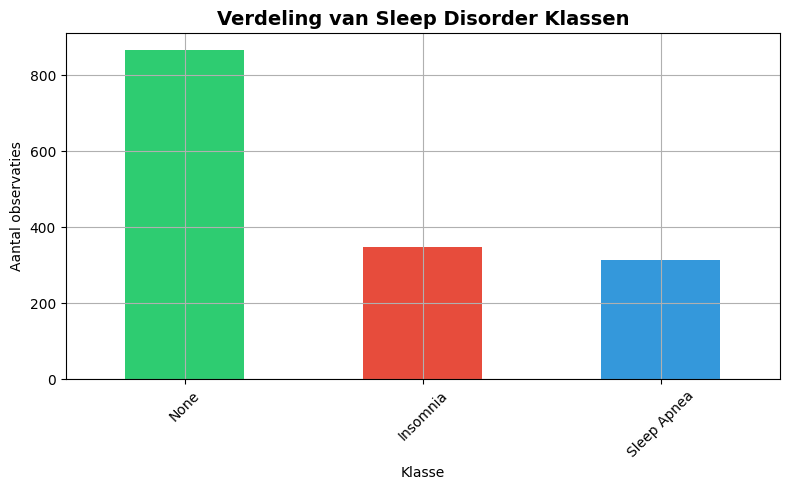


--------------------------------------------------------------------------------
INTERPRETATIE VAN KLASSENBALANS
--------------------------------------------------------------------------------

Imbalance ratio (grootste/kleinste klasse): 2.77
Er is enige klassenonevenwichtigheid. Overweeg stratified sampling en
  class_weight='balanced' parameter bij sommige modellen.


In [73]:
# ============================================================================
# STAP 3: TARGET VARIABELE ANALYSE
# ============================================================================
print("\n" + "="*80)
print("STAP 3: TARGET VARIABELE ANALYSE")
print("="*80)

print("\nDe target variabele 'Sleep Disorder' vormt de basis voor ons classificatieprobleem.")
print("We onderzoeken de verdeling van klassen om te bepalen of we te maken hebben met")
print("class imbalance en of dit speciale aandacht vereist tijdens modeltraining.\n")

# Vervang NaN in Sleep Disorder met 'None'
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('None')

print("Verdeling van Sleep Disorder:")
class_distribution = df['Sleep Disorder'].value_counts()
print(class_distribution)
print(f"\nPercentages:")
print(df['Sleep Disorder'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df['Sleep Disorder'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c', '#3498db'])
plt.title("Verdeling van Sleep Disorder Klassen", fontsize=14, fontweight='bold')
plt.xlabel("Klasse")
plt.ylabel("Aantal observaties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n" + "-"*80)
print("INTERPRETATIE VAN KLASSENBALANS")
print("-"*80)

# Bereken imbalance ratio
min_class = class_distribution.min()
max_class = class_distribution.max()
imbalance_ratio = max_class / min_class

print(f"\nImbalance ratio (grootste/kleinste klasse): {imbalance_ratio:.2f}")

if imbalance_ratio < 1.5:
    print(" De klassen zijn redelijk gebalanceerd. Standaard modeltraining is geschikt.")
elif imbalance_ratio < 3:
    print("Er is enige klassenonevenwichtigheid. Overweeg stratified sampling en")
    print("  class_weight='balanced' parameter bij sommige modellen.")
else:
    print("Significante klassenonevenwichtigheid gedetecteerd!")
    print("  Overweeg: SMOTE, class weighting, of stratified k-fold cross-validation.")


In [74]:

# ============================================================================
# STAP 4: MULTICLASS VS BINARY CLASSIFICATIE - ONDERBOUWING
# ============================================================================
print("\n" + "="*80)
print("STAP 4: MODELTYPE KEUZE - MULTICLASS VS BINARY CLASSIFICATIE")
print("="*80)

print("""
RATIONALE VOOR MULTICLASS CLASSIFICATIE:
-----------------------------------------

Onze target variabele heeft drie categorieën:
1. None (geen slaapstoornis)
2. Insomnia (slapeloosheid)
3. Sleep Apnea (slaapapneu)

WAAROM MULTICLASS IN PLAATS VAN BINARY?
========================================

1. KLINISCHE RELEVANTIE:
   • Insomnia en Sleep Apnea hebben verschillende oorzaken, symptomen en behandelingen
   • Een binair model (wel/geen stoornis) zou deze cruciale distinctie verliezen
   • Voor medisch personeel is het essentieel om het TYPE stoornis te identificeren

2. BEHANDELINGSIMPLICATIES:
   • Insomnia → vaak cognitieve gedragstherapie, slaaphygiëne, medicatie
   • Sleep Apnea → CPAP-apparaat, gewichtsreductie, operatieve ingrepen
   • De aanpak verschilt fundamenteel

3. DIAGNOSTISCHE WAARDE:
   • Verschillende risicoprofielen: Sleep Apnea correleert met BMI en hartslag,
     Insomnia vaak met stress en levensstijlfactoren
   • Een multiclass model kan deze subtiele patronen onderscheiden

4. MODELCOMPLEXITEIT VS INFORMATIEBEHOUD:
   • Trade-off: multiclass is complexer, maar behoudt essentiële informatie
   • In medische context weegt informatieverlies zwaarder dan modelcomplexiteit


""")



STAP 4: MODELTYPE KEUZE - MULTICLASS VS BINARY CLASSIFICATIE

RATIONALE VOOR MULTICLASS CLASSIFICATIE:
-----------------------------------------

Onze target variabele heeft drie categorieën:
1. None (geen slaapstoornis)
2. Insomnia (slapeloosheid)
3. Sleep Apnea (slaapapneu)

WAAROM MULTICLASS IN PLAATS VAN BINARY?

1. KLINISCHE RELEVANTIE:
   • Insomnia en Sleep Apnea hebben verschillende oorzaken, symptomen en behandelingen
   • Een binair model (wel/geen stoornis) zou deze cruciale distinctie verliezen
   • Voor medisch personeel is het essentieel om het TYPE stoornis te identificeren

2. BEHANDELINGSIMPLICATIES:
   • Insomnia → vaak cognitieve gedragstherapie, slaaphygiëne, medicatie
   • Sleep Apnea → CPAP-apparaat, gewichtsreductie, operatieve ingrepen
   • De aanpak verschilt fundamenteel

3. DIAGNOSTISCHE WAARDE:
   • Verschillende risicoprofielen: Sleep Apnea correleert met BMI en hartslag,
     Insomnia vaak met stress en levensstijlfactoren
   • Een multiclass model kan de

In [75]:

# ============================================================================
# STAP 5: FEATURE TYPE IDENTIFICATIE EN CATEGORISATIE
# ============================================================================
print("\n" + "="*80)
print("STAP 5: FEATURE TYPE IDENTIFICATIE")
print("="*80)

# Numerieke kolommen
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Verwijder Person ID uit numerieke features (is geen predictive feature)
num_cols = [col for col in num_cols if col != 'Person ID']

# Categorische kolommen
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Verwijder target uit categorische features
cat_feature_cols = [col for col in cat_cols if col != 'Sleep Disorder']

print(f"\nNumerieke features ({len(num_cols)}):")
for col in num_cols:
    print(f"  • {col}")

print(f"\nCategorische features ({len(cat_feature_cols)}):")
for col in cat_feature_cols:
    unique_values = df[col].nunique()
    print(f"  • {col} ({unique_values} unieke waarden)")
    print(f"    Waarden: {df[col].unique()[:5].tolist()}")



STAP 5: FEATURE TYPE IDENTIFICATIE

Numerieke features (7):
  • Age
  • Sleep Duration
  • Quality of Sleep
  • Physical Activity Level
  • Stress Level
  • Heart Rate
  • Daily Steps

Categorische features (4):
  • Gender (2 unieke waarden)
    Waarden: ['Male', 'Female']
  • Occupation (11 unieke waarden)
    Waarden: ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher', 'Nurse']
  • BMI Category (4 unieke waarden)
    Waarden: ['Overweight', 'Normal', 'Obese', 'Normal Weight']
  • Blood Pressure (25 unieke waarden)
    Waarden: ['126/83', '125/80', '140/90', '120/80', '132/87']


In [76]:

# ============================================================================
# STAP 5: FEATURE TYPE IDENTIFICATIE EN CATEGORISATIE
# ============================================================================
print("\n" + "="*80)
print("STAP 5: FEATURE TYPE IDENTIFICATIE")
print("="*80)

# Numerieke kolommen
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Verwijder Person ID uit numerieke features (is geen predictive feature)
num_cols = [col for col in num_cols if col != 'Person ID']

# Categorische kolommen
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# Verwijder target uit categorische features
cat_feature_cols = [col for col in cat_cols if col != 'Sleep Disorder']

print(f"\nNumerieke features ({len(num_cols)}):")
for col in num_cols:
    print(f"  • {col}")

print(f"\nCategorische features ({len(cat_feature_cols)}):")
for col in cat_feature_cols:
    unique_values = df[col].nunique()
    print(f"  • {col} ({unique_values} unieke waarden)")
    print(f"    Waarden: {df[col].unique()[:5].tolist()}")




STAP 5: FEATURE TYPE IDENTIFICATIE

Numerieke features (7):
  • Age
  • Sleep Duration
  • Quality of Sleep
  • Physical Activity Level
  • Stress Level
  • Heart Rate
  • Daily Steps

Categorische features (4):
  • Gender (2 unieke waarden)
    Waarden: ['Male', 'Female']
  • Occupation (11 unieke waarden)
    Waarden: ['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher', 'Nurse']
  • BMI Category (4 unieke waarden)
    Waarden: ['Overweight', 'Normal', 'Obese', 'Normal Weight']
  • Blood Pressure (25 unieke waarden)
    Waarden: ['126/83', '125/80', '140/90', '120/80', '132/87']



STAP 6: EXPLORATIEVE DATA ANALYSE (EDA)

--------------------------------------------------------------------------------
DISTRIBUTIE VAN NUMERIEKE VARIABELEN
--------------------------------------------------------------------------------


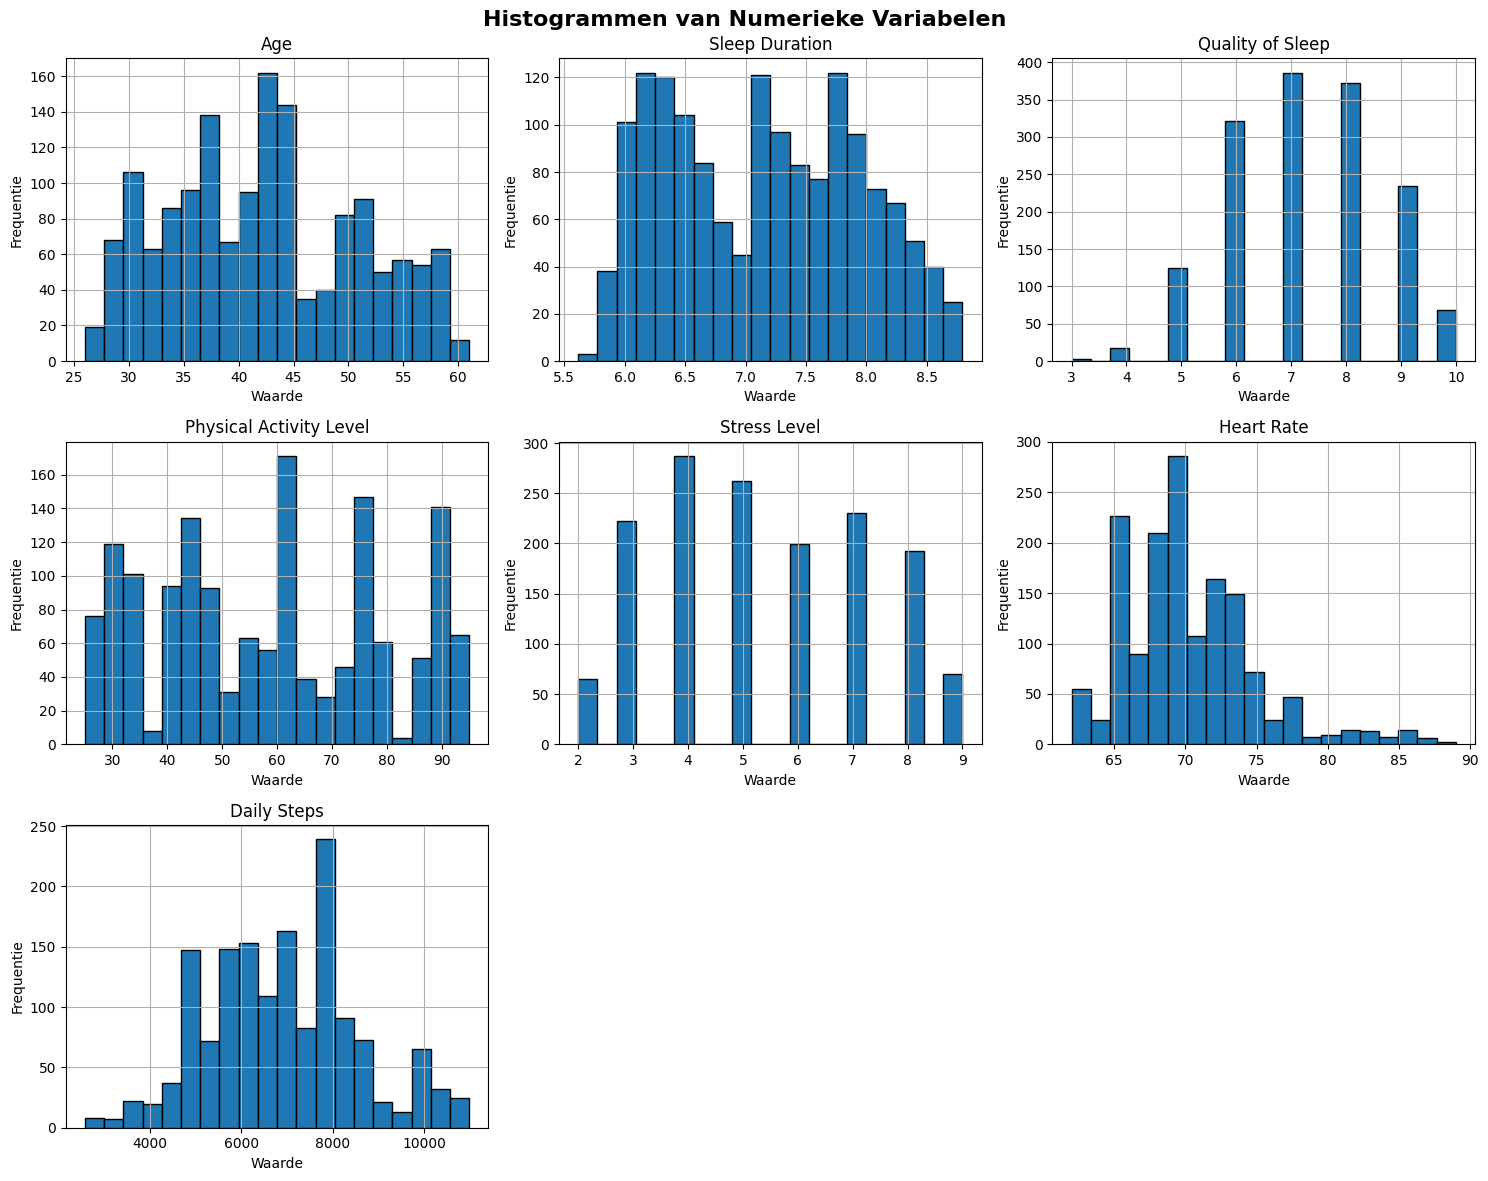


INTERPRETATIE VAN DISTRIBUTIES:
• Sleep Duration: Normalish verdeling rond 7-8 uur (verwacht patroon)
• Quality of Sleep: Concentratie rond hogere waarden (7-9)
• Stress Level: Spreiding over gehele schaal
• Physical Activity Level: Variatie in activiteitsniveaus
• Heart Rate: Concentratie rond 70-80 bpm (normaal rustritme)
• Daily Steps: Rechtse scheefheid (veel lage waarden, enkele zeer hoge)


--------------------------------------------------------------------------------
CORRELATIE ANALYSE
--------------------------------------------------------------------------------

Correlatiematrix geeft inzicht in lineaire relaties tussen variabelen.
Hoge correlaties tussen features kunnen wijzen op multicollineariteit.



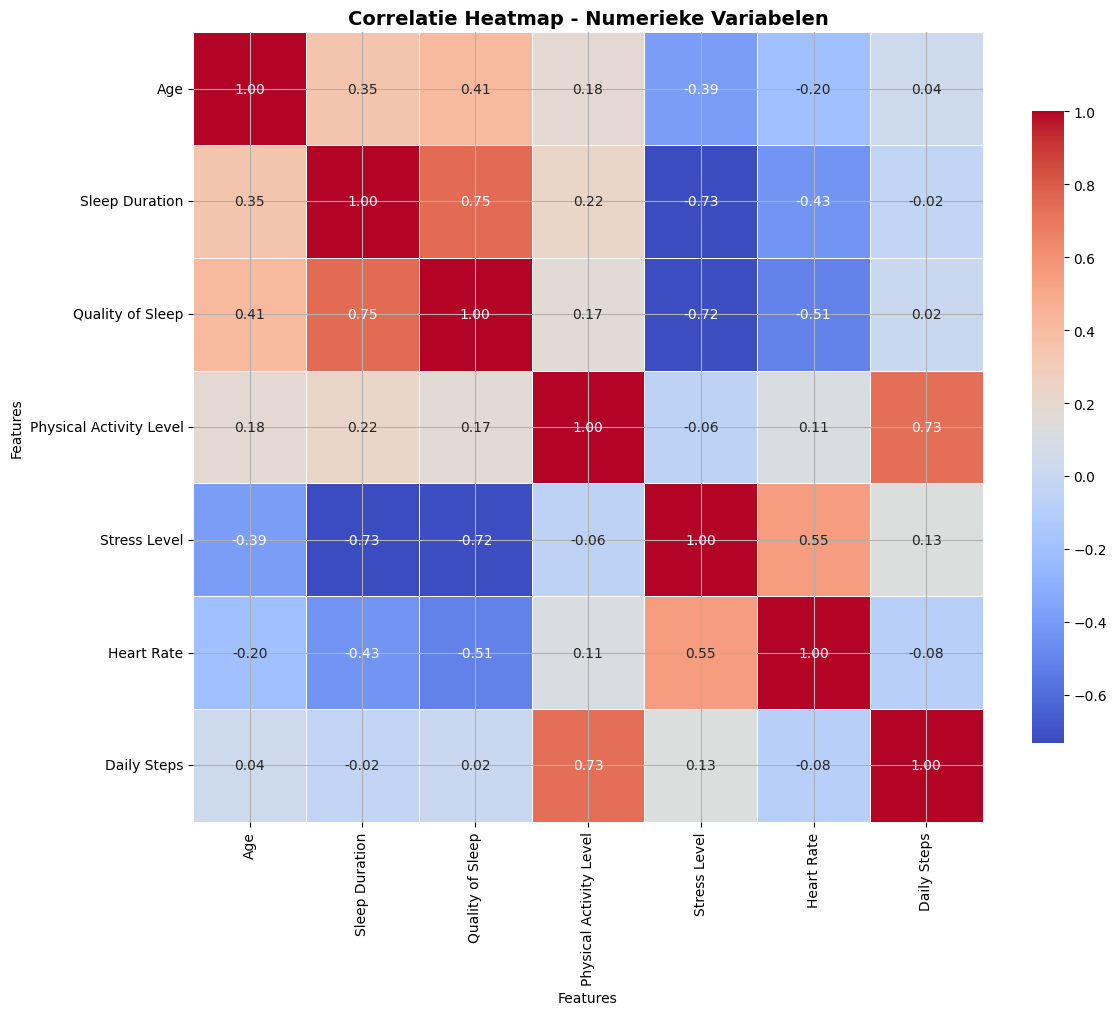


Sterk gecorreleerde variabelen (|r| > 0.7):
  • Sleep Duration ↔ Quality of Sleep: r = 0.748
  • Sleep Duration ↔ Stress Level: r = -0.732
  • Quality of Sleep ↔ Stress Level: r = -0.720
  • Physical Activity Level ↔ Daily Steps: r = 0.732

--------------------------------------------------------------------------------
PAIRPLOT - RELATIES TUSSEN BELANGRIJKE VARIABELEN
--------------------------------------------------------------------------------

Pairplot van 6 belangrijkste variabelen
Dit helpt om non-lineaire relaties en clusters te identificeren.



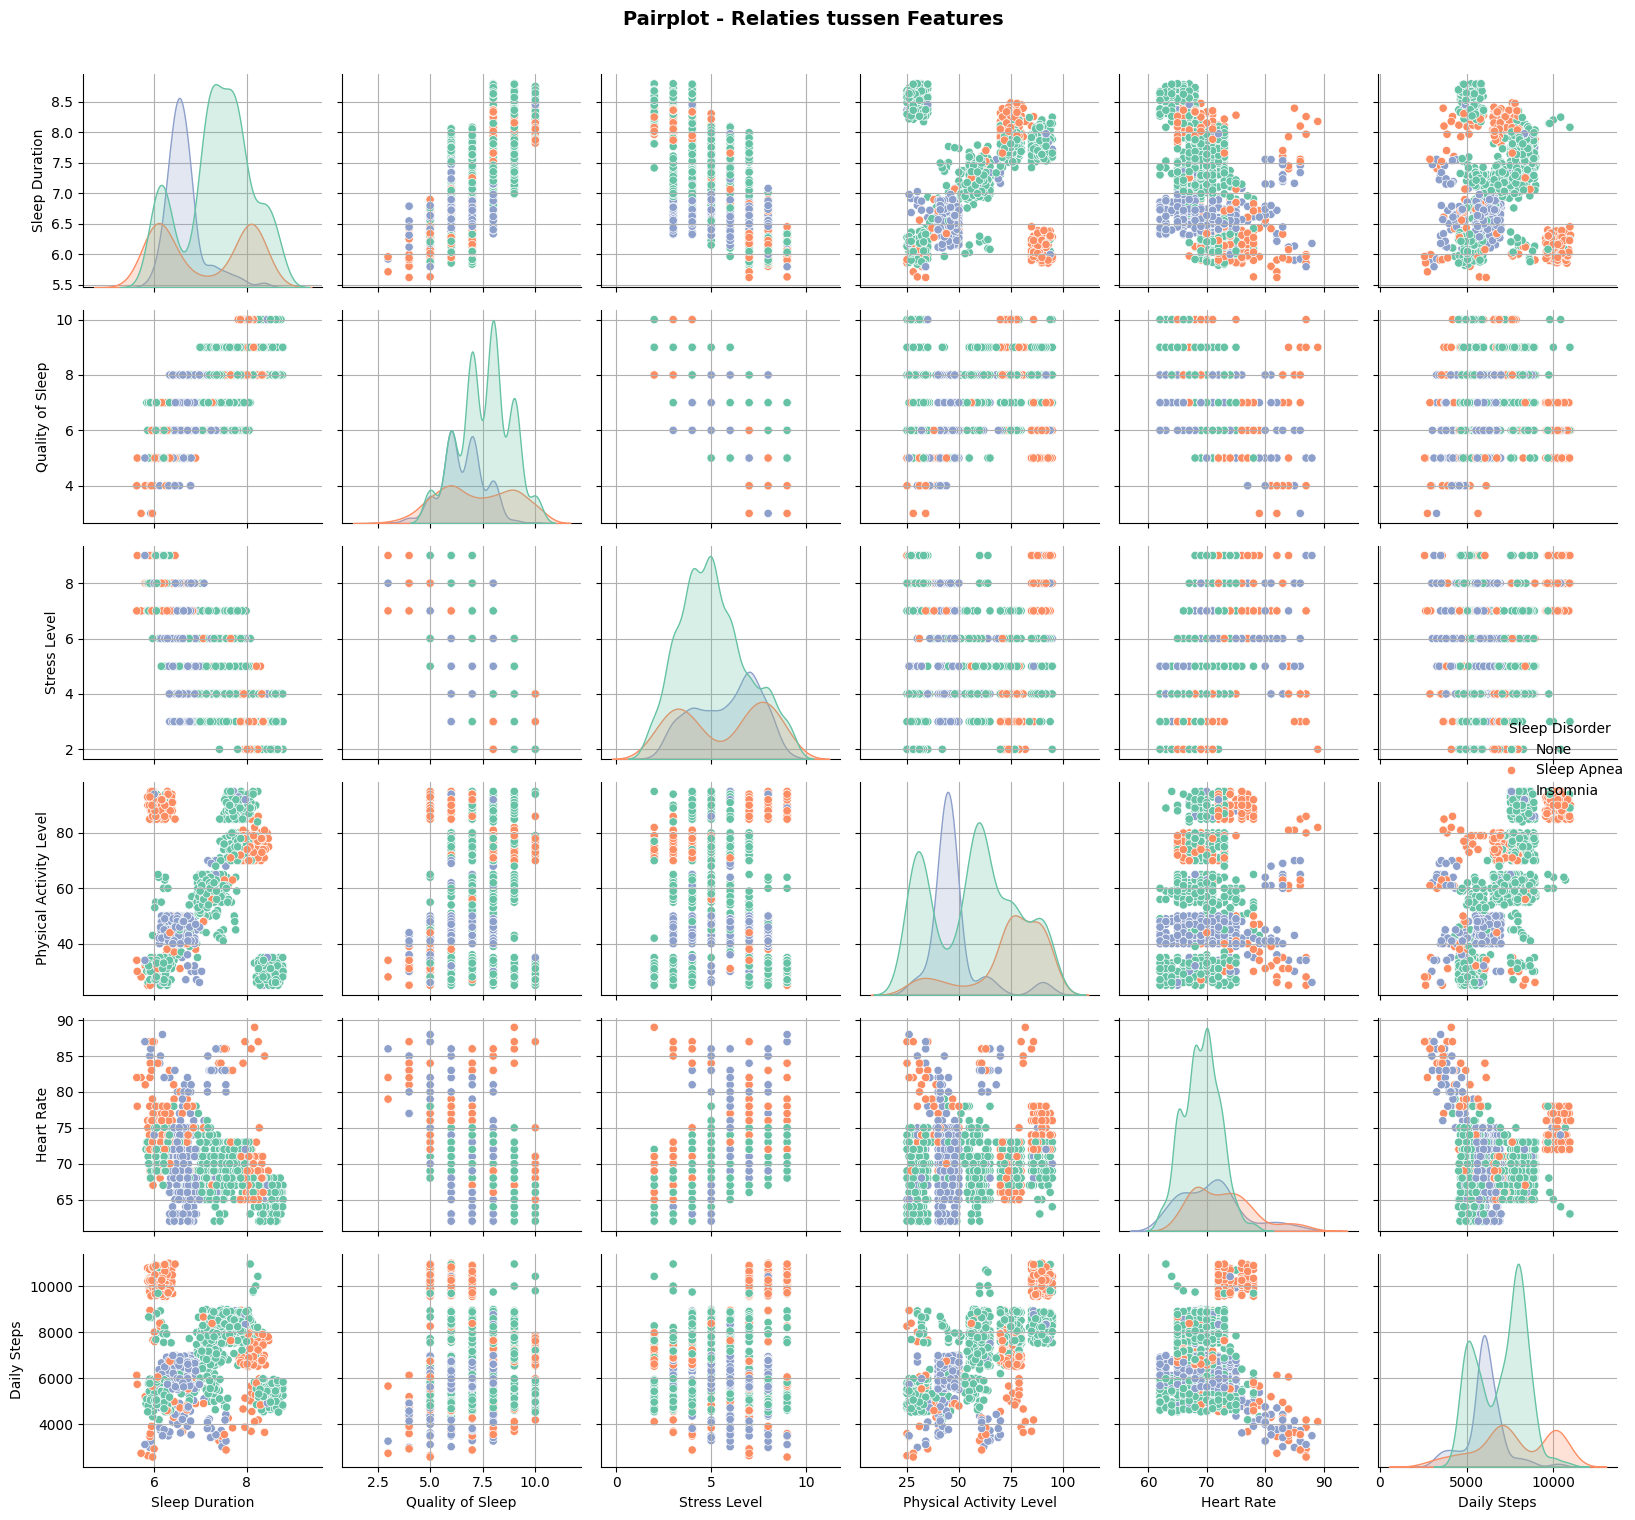

In [77]:
# ============================================================================
# STAP 6: EXPLORATIEVE DATA ANALYSE (EDA)
# ============================================================================
print("\n" + "="*80)
print("STAP 6: EXPLORATIEVE DATA ANALYSE (EDA)")
print("="*80)

print("\n" + "-"*80)
print("DISTRIBUTIE VAN NUMERIEKE VARIABELEN")
print("-"*80)

# Maak histogrammen en voeg expliciete x/y labels toe voor duidelijkheid
axes = df[num_cols].hist(figsize=(15, 12), bins=20, edgecolor='black')
plt.suptitle("Histogrammen van Numerieke Variabelen", fontsize=16, fontweight='bold')
# axes kan een 2D-array of 1D-array zijn afhankelijk van aantal kolommen; flattend maakt iteratie veilig
try:
    ax_list = axes.flatten()
except Exception:
    ax_list = [axes] if hasattr(axes, 'get_axes') else list(axes)
for ax in ax_list:
    # X-as toont de waarden van de feature, Y-as de frequentie
    ax.set_xlabel('Waarde')
    ax.set_ylabel('Frequentie')
plt.tight_layout()
plt.show()

print("""
INTERPRETATIE VAN DISTRIBUTIES:
• Sleep Duration: Normalish verdeling rond 7-8 uur (verwacht patroon)
• Quality of Sleep: Concentratie rond hogere waarden (7-9)
• Stress Level: Spreiding over gehele schaal
• Physical Activity Level: Variatie in activiteitsniveaus
• Heart Rate: Concentratie rond 70-80 bpm (normaal rustritme)
• Daily Steps: Rechtse scheefheid (veel lage waarden, enkele zeer hoge)
""")

print("\n" + "-"*80)
print("CORRELATIE ANALYSE")
print("-"*80)

print("\nCorrelatiematrix geeft inzicht in lineaire relaties tussen variabelen.")
print("Hoge correlaties tussen features kunnen wijzen op multicollineariteit.\n")

plt.figure(figsize=(12, 10))
correlation_matrix = df[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlatie Heatmap - Numerieke Variabelen", fontsize=14, fontweight='bold')
# Duidelijke labels voor assen zodat het meteen zichtbaar is welke features op beide assen staan
plt.xlabel('Features')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Identificeer sterke correlaties (|r| > 0.7, exclusief diagonaal)
print("\nSterk gecorreleerde variabelen (|r| > 0.7):")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            strong_correlations.append({
                'Var1': correlation_matrix.columns[i],
                'Var2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if strong_correlations:
    for corr in strong_correlations:
        print(f"  • {corr['Var1']} ↔ {corr['Var2']}: r = {corr['Correlation']:.3f}")
else:
    print("  ✓ Geen sterke correlaties gevonden (geen multicollineariteit issues)")

print("\n" + "-"*80)
print("PAIRPLOT - RELATIES TUSSEN BELANGRIJKE VARIABELEN")
print("-"*80)

# Selecteer subset voor pairplot (anders te groot)
cols_for_pairplot = [
    'Sleep Duration',
    'Quality of Sleep',
    'Stress Level',
    'Physical Activity Level',
    'Heart Rate',
    'Daily Steps'
]
cols_for_pairplot = [c for c in cols_for_pairplot if c in df.columns]

print(f"\nPairplot van {len(cols_for_pairplot)} belangrijkste variabelen")
print("Dit helpt om non-lineaire relaties en clusters te identificeren.\n")

sns.pairplot(df[cols_for_pairplot + ['Sleep Disorder']], 
             hue='Sleep Disorder', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot - Relaties tussen Features", y=1.01, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()



STAP 7: OUTLIER DETECTIE EN BEHANDELING

METHODOLOGIE: IQR (INTERQUARTILE RANGE) METHODE

De IQR-methode definieert outliers als waarden die buiten de volgende grenzen vallen:
• Lower bound = Q1 - 1.5 × IQR
• Upper bound = Q3 + 1.5 × IQR

KRITISCHE VRAAG: MOETEN WE OUTLIERS VERWIJDEREN?

In dit project verwijderen we outliers niet automatisch. In plaats daarvan passen we een conservatieve
capping/winsorization toe: zeer hoge of lage waarden worden begrensd tot een minimum of maximum.
Op deze manier behouden we alle observaties (belangrijk in medische datasets), maar verminderen
we de invloed van onrepresentatieve uitschieters op het model.

Zie Figure 1 (onder de EDA) voor een voorbeeld van de Daily Steps distributie.


--------------------------------------------------------------------------------
OUTLIER IDENTIFICATIE PER VARIABELE
--------------------------------------------------------------------------------

Outlier Samenvatting (gesorteerd op percentage):


,count,pct,lower,upper,Q1,Q3
Heart Rate,65,4.253927,59.500000,79.500000,67.000000,72.0
Age,0,0.000000,14.000000,70.000000,35.000000,49.0
Sleep Duration,0,0.000000,4.316303,9.890218,6.406521,7.8
Quality of Sleep,0,0.000000,3.000000,11.000000,6.000000,8.0
Physical Activity Level,0,0.000000,-7.500000,124.500000,42.000000,75.0
Stress Level,0,0.000000,-0.500000,11.500000,4.000000,7.0
Daily Steps,0,0.000000,2411.875000,11352.875000,5764.750000,8000.0



--------------------------------------------------------------------------------
VISUALISATIE: BOXPLOTS VOOR OUTLIER DETECTIE
--------------------------------------------------------------------------------


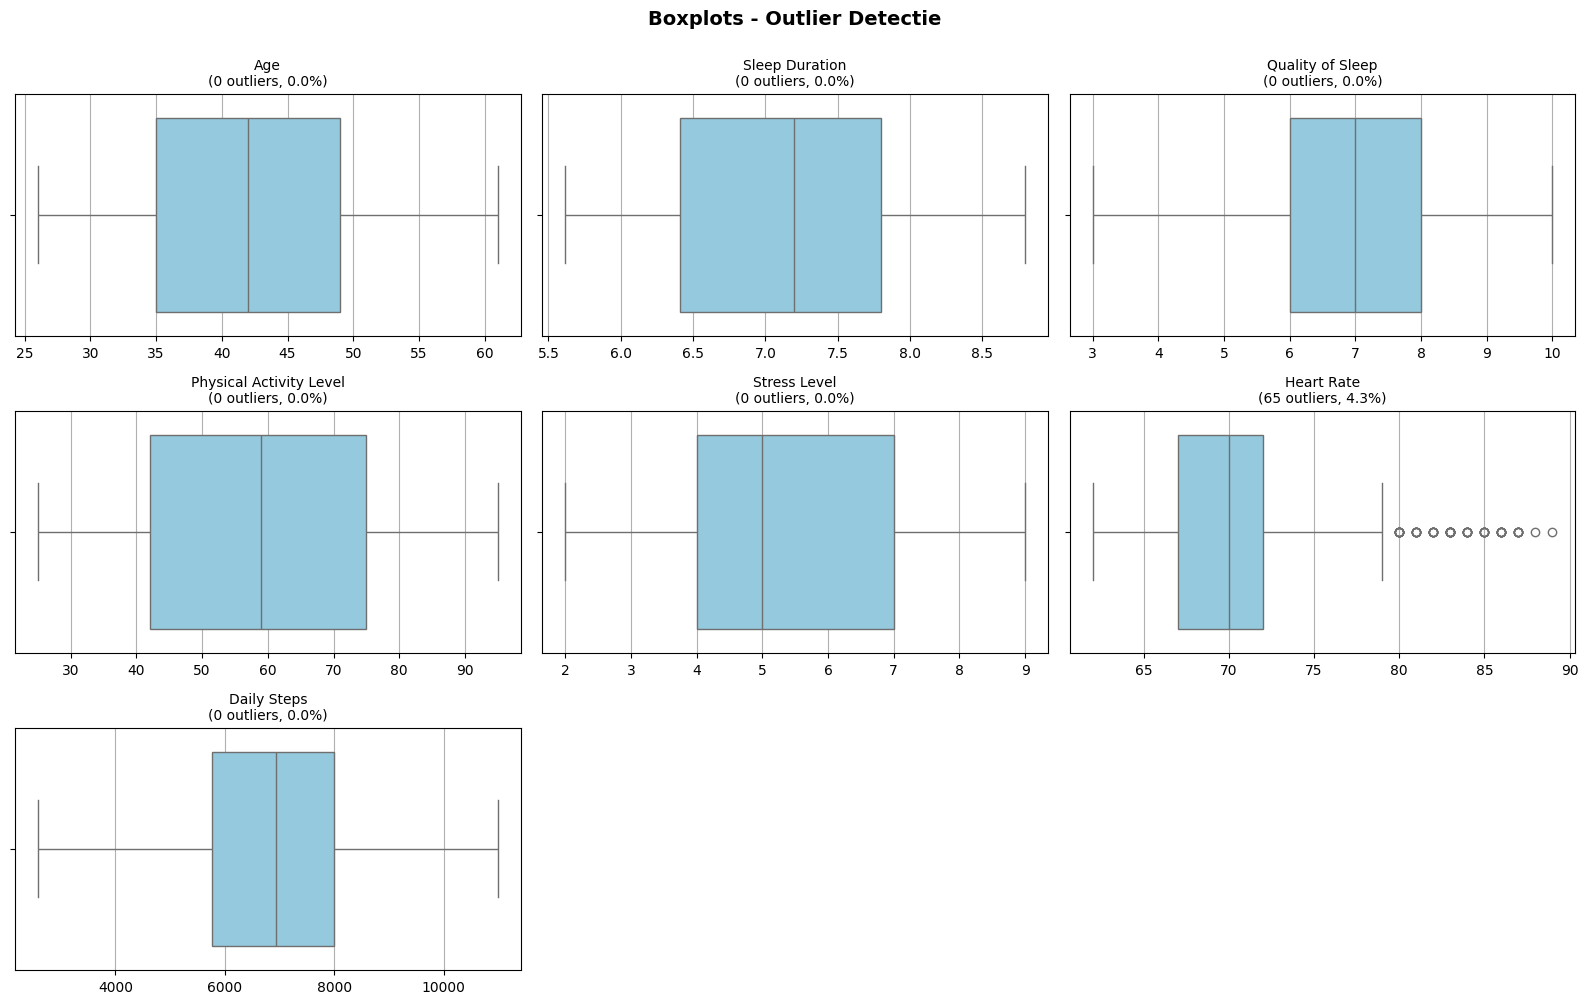


OUTLIER BEHANDELING STRATEGIE - GEFUNDEERDE BESLISSINGEN (CAPPING)

PRINCIPE: CONSERVATIEVE AANPAK

- We verwijderen geen rijen puur op basis van IQR-outliers.
- We gebruiken winsorization/clipping (capping) voor sterk scheve/dispersed variabelen
  en voor duidelijk onrealistische waarden.
- Dit behoudt klinisch relevante extreme cases, maar vermindert de invloed van meetfouten
  en ongebruikelijke uitschieters op modeltraining.


--------------------------------------------------------------------------------
IMPLEMENTATIE VAN BEHANDELING (CAPPING / WINSORIZATION)
--------------------------------------------------------------------------------

1. DAILY STEPS - Winsorization / Capping (1% - 99%)
----------------------------------------
   Originele range: 2583 - 10990 stappen
   Gecapte range: 3441 - 10769 stappen
   Rationale: Extreme waarden kunnen tracking fouten zijn. Winsorization behoudt data maar beperkt invloed.

2. HEART RATE - Capping naar plausibele range (40 - 120 bpm)
--

In [ ]:
# ============================================================================
# STAP 7: OUTLIER DETECTIE EN BEHANDELING - GEFUNDEERDE AANPAK 
# ============================================================================
print("\n" + "="*80)
print("STAP 7: OUTLIER DETECTIE EN BEHANDELING")
print("="*80)

print("""
METHODOLOGIE: IQR (INTERQUARTILE RANGE) METHODE
================================================

De IQR-methode definieert outliers als waarden die buiten de volgende grenzen vallen:
• Lower bound = Q1 - 1.5 × IQR
• Upper bound = Q3 + 1.5 × IQR

KRITISCHE VRAAG: MOETEN WE OUTLIERS VERWIJDEREN?
==================================================

In dit project verwijderen we outliers niet automatisch. In plaats daarvan passen we een conservatieve
capping/winsorization toe: zeer hoge of lage waarden worden begrensd tot een minimum of maximum.
Op deze manier behouden we alle observaties (belangrijk in medische datasets), maar verminderen
we de invloed van onrepresentatieve uitschieters op het model.


""")

# Werk op een kopie
df_clean = df.copy()

print("\n" + "-"*80)
print("OUTLIER IDENTIFICATIE PER VARIABELE")
print("-"*80)

outlier_info = {}
for col in num_cols:
    q1 = df_clean[col].quantile(0.25)
    q3 = df_clean[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df_clean[col] < lower) | (df_clean[col] > upper)
    outlier_count = int(mask.sum())
    outlier_pct = 100 * outlier_count / len(df_clean)
    outlier_info[col] = {
        'count': outlier_count,
        'pct': float(outlier_pct),
        'lower': float(lower),
        'upper': float(upper),
        'Q1': float(q1),
        'Q3': float(q3)
    }

outlier_summary = pd.DataFrame.from_dict(outlier_info, orient='index')
outlier_summary = outlier_summary.sort_values('pct', ascending=False)
print("\nOutlier Samenvatting (gesorteerd op percentage):")
display(outlier_summary)

print("\n" + "-"*80)
print("VISUALISATIE: BOXPLOTS VOOR OUTLIER DETECTIE")
print("-"*80)

plt.figure(figsize=(16, 10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col], color='skyblue')
    title = f"{col}\n({outlier_summary.loc[col, 'count']:.0f} outliers, {outlier_summary.loc[col, 'pct']:.1f}%)"
    plt.title(title, fontsize=10)
    plt.xlabel('')
plt.suptitle("Boxplots - Outlier Detectie", fontsize=14, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("OUTLIER BEHANDELING STRATEGIE - GEFUNDEERDE BESLISSINGEN (CAPPING)")
print("="*80)

print("""
PRINCIPE: CONSERVATIEVE AANPAK
=============================

- We verwijderen geen rijen puur op basis van IQR-outliers.
- We gebruiken winsorization/clipping (capping) voor sterk scheve/dispersed variabelen
  en voor duidelijk onrealistische waarden.
- Dit behoudt klinisch relevante extreme cases, maar vermindert de invloed van meetfouten
  en ongebruikelijke uitschieters op modeltraining.
""")

print("\n" + "-"*80)
print("IMPLEMENTATIE VAN BEHANDELING (CAPPING / WINSORIZATION)")
print("-"*80)

# Strategie 1: Winsorization / capping voor Daily Steps (1% - 99%)
if 'Daily Steps' in df_clean.columns:
    print("\n1. DAILY STEPS - Winsorization / Capping (1% - 99%)")
    print("-" * 40)
    original_min = df_clean['Daily Steps'].min()
    original_max = df_clean['Daily Steps'].max()
    low_p, high_p = df_clean['Daily Steps'].quantile([0.01, 0.99])
    # Maak aparte kolom zodat origineel behouden blijft
    df_clean['Daily Steps_winsor'] = np.clip(df_clean['Daily Steps'], low_p, high_p)
    print(f"   Originele range: {original_min:.0f} - {original_max:.0f} stappen")
    print(f"   Gecapte range: {low_p:.0f} - {high_p:.0f} stappen")
    print("   Rationale: Extreme waarden kunnen tracking fouten zijn. Winsorization behoudt data maar beperkt invloed.")

# Strategie 2: Heart Rate - capping naar plausibele range (40 - 120 bpm)
if 'Heart Rate' in df_clean.columns:
    print("\n2. HEART RATE - Capping naar plausibele range (40 - 120 bpm)")
    print("-" * 40)
    original_hr_min = df_clean['Heart Rate'].min()
    original_hr_max = df_clean['Heart Rate'].max()
    hr_lower, hr_upper = 40, 120
    df_clean['Heart Rate_capped'] = df_clean['Heart Rate'].clip(lower=hr_lower, upper=hr_upper)
    print(f"   Originele hartslag range: {original_hr_min:.0f} - {original_hr_max:.0f} bpm")
    print(f"   Gecapte hartslag range: {hr_lower} - {hr_upper} bpm")
    print("   Rationale: Clipping behoudt observaties maar vermindert invloed van onrealistische uitschieters.")

# Strategie 3: Plausibiliteitscontroles (geen verwijdering, enkel waarschuwingen)
print("\n3. ANDERE VARIABELEN - Plausibiliteitscheck (geen verwijdering)")
print("-" * 40)

# Sleep Duration (we behouden, want korte/lange slaap kan klinisch relevant zijn)
if 'Sleep Duration' in df_clean.columns:
    invalid_sleep = (df_clean['Sleep Duration'] < 0) | (df_clean['Sleep Duration'] > 24)
    if invalid_sleep.sum() > 0:
        print(f"   ⚠ Sleep Duration: {invalid_sleep.sum()} waarden buiten 0-24 uur (controle aanbevolen)")
    else:
        print("   ✓ Sleep Duration: alle waarden binnen 0-24 uur")

# BMI (optioneel)
if 'BMI' in df_clean.columns:
    invalid_bmi = (df_clean['BMI'] < 5) | (df_clean['BMI'] > 70)
    if invalid_bmi.sum() > 0:
        print(f"   ⚠ BMI: {invalid_bmi.sum()} waarden buiten 5-70 (controle aanbevolen)")
    else:
        print("   ✓ BMI waarden binnen plausibel bereik")

print("\n" + "-"*80)
print("RESULTAAT VAN OUTLIER BEHANDELING (CAPPING / WINSORIZATION)")
print("-"*80)

# We hebben geen rijen verwijderd; we hebben waarden gecapped/winsorized.
rows_removed = 0
pct_removed = 0.0

print(f"\nOriginele dataset: {df.shape[0]} rijen × {df.shape[1]} kolommen")
print(f"Opgeschoonde dataset: {df_clean.shape[0]} rijen × {df_clean.shape[1]} kolommen")
print(f"Verwijderd: {rows_removed} rijen ({pct_removed:.2f}%) - geen rijen verwijderd, we hebben capping toegepast")

print("\n✓ We hebben extreme waarden beperkt via winsorization/clipping zodat geen onrealistische uitschieters het model domineren.")


In [79]:

# ============================================================================
# STAP 8: FEATURE ENCODING - CATEGORISCHE VARIABELEN TRANSFORMEREN
# ============================================================================
print("\n" + "="*80)
print("STAP 8: FEATURE ENCODING - CATEGORISCHE VARIABELEN")
print("="*80)

print("""
WAAROM ENCODING NODIG IS:
=========================

Machine learning modellen werken met numerieke waarden. Categorische variabelen
zoals 'Gender' (Male/Female) of 'BMI Category' (Normal/Overweight/Obese) moeten
worden omgezet naar een numerieke representatie.

ENCODING METHODEN:
==================

1. LABEL ENCODING:
   • Ordinal categorieën: 'Low' → 0, 'Medium' → 1, 'High' → 2
   • Nadeel: impliceert orde/rangorde (2 > 1 > 0)
   • Gebruik alleen voor ordinale variabelen of target variabele

2. ONE-HOT ENCODING:
   • Nominale categorieën: 'Male' → [1,0], 'Female' → [0,1]
   • Voordeel: geen kunstmatige ordinale relatie
   • Nadeel: verhoogt dimensionaliteit (curse of dimensionality bij veel categorieën)
   • Drop_first=True om multicollineariteit te voorkomen (dummy variable trap)

ONZE AANPAK:
============
• Feature variabelen → One-hot encoding
• Target variabele → Label encoding (nodig voor sklearn classificatie)
""")

# Verwijder Person ID (geen predictive waarde)
if 'Person ID' in df_clean.columns:
    print("\n✗ Verwijderen 'Person ID' (identificatieveld, geen feature)")
    df_clean = df_clean.drop(columns=['Person ID'])

# Identificeer categorische feature kolommen (exclusief target)
cat_cols_clean = df_clean.select_dtypes(include=['object']).columns.tolist()
feature_cat_cols = [c for c in cat_cols_clean if c != 'Sleep Disorder']

print(f"\nCategorische features voor encoding ({len(feature_cat_cols)}):")
for col in feature_cat_cols:
    unique_vals = df_clean[col].nunique()
    print(f"  • {col}: {unique_vals} categorieën")
    print(f"    Waarden: {df_clean[col].unique().tolist()}")

print("\n" + "-"*80)
print("TOEPASSEN ONE-HOT ENCODING")
print("-"*80)

print(f"\nVoor encoding: {df_clean.shape[1]} kolommen")

# One-hot encoding met drop_first=True
df_encoded = pd.get_dummies(df_clean, columns=feature_cat_cols, drop_first=True)

print(f"Na encoding: {df_encoded.shape[1]} kolommen")
print(f"Nieuwe kolommen gecreëerd: {df_encoded.shape[1] - df_clean.shape[1]}")

print("\nVoorbeeld van nieuwe kolommen:")
new_cols = [col for col in df_encoded.columns if col not in df_clean.columns]
for col in new_cols[:10]:  # Toon eerste 10
    print(f"  • {col}")

print("\n" + "-"*80)
print("TARGET VARIABELE ENCODING")
print("-"*80)

# Label encoding voor target
le = LabelEncoder()
df_encoded['Sleep Disorder'] = le.fit_transform(df_encoded['Sleep Disorder'].astype(str))

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("\nLabel Encoding mapping:")
for original, encoded in label_mapping.items():
    count = (df_encoded['Sleep Disorder'] == encoded).sum()
    print(f"  '{original}' → {encoded} ({count} observaties)")

print("\nRationale: Label encoding voor target is noodzakelijk voor sklearn classificatie.")
print("De numerieke waarden hebben geen ordinale betekenis in multiclass setting.")

print("\nEerste 5 rijen van encoded dataset:")
display(df_encoded.head())



STAP 8: FEATURE ENCODING - CATEGORISCHE VARIABELEN

WAAROM ENCODING NODIG IS:

Machine learning modellen werken met numerieke waarden. Categorische variabelen
zoals 'Gender' (Male/Female) of 'BMI Category' (Normal/Overweight/Obese) moeten
worden omgezet naar een numerieke representatie.

ENCODING METHODEN:

1. LABEL ENCODING:
   • Ordinal categorieën: 'Low' → 0, 'Medium' → 1, 'High' → 2
   • Nadeel: impliceert orde/rangorde (2 > 1 > 0)
   • Gebruik alleen voor ordinale variabelen of target variabele

2. ONE-HOT ENCODING:
   • Nominale categorieën: 'Male' → [1,0], 'Female' → [0,1]
   • Voordeel: geen kunstmatige ordinale relatie
   • Nadeel: verhoogt dimensionaliteit (curse of dimensionality bij veel categorieën)
   • Drop_first=True om multicollineariteit te voorkomen (dummy variable trap)

ONZE AANPAK:
• Feature variabelen → One-hot encoding
• Target variabele → Label encoding (nodig voor sklearn classificatie)


✗ Verwijderen 'Person ID' (identificatieveld, geen feature)

Categorisc

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Daily Steps_winsor,Heart Rate_capped,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,27,6.1,6,42,6,77,4200,1,4200.00,77,...,False,False,False,False,False,False,False,False,False,False
1,28,6.2,6,60,8,75,10000,1,10000.00,75,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,75,10000,1,10000.00,75,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,4,30,8,85,3000,2,3441.42,85,...,False,False,False,False,False,False,False,True,False,False
4,28,5.9,4,30,8,85,3000,2,3441.42,85,...,False,False,False,False,False,False,False,True,False,False


In [119]:

# ============================================================================
# STAP 9: FEATURE SCALING - NORMALISATIE EN STANDAARDISATIE
# ============================================================================
print("\n" + "="*80)
print("STAP 9: FEATURE SCALING (STANDARDISATIE)")
print("="*80)

print("""
WAAROM FEATURE SCALING NODIG IS:
=================================

Variabelen hebben verschillende schalen:
• Daily Steps: 0 - 10,000+ 
• Quality of Sleep: 1 - 10
• Heart Rate: 50 - 100 bpm

PROBLEEM ZONDER SCALING:
• Distance-based modellen (KNN) worden gedomineerd door features met grote schaal
• Gradient descent convergeert langzamer
• Regularisatie (L1/L2) werkt niet eerlijk tussen features

METHODEN:
=========

1. MIN-MAX NORMALISATIE (0-1 range):
   x_scaled = (x - x_min) / (x_max - x_min)
   • Voordeel: Behoudt distributie shape
   • Nadeel: Gevoelig voor outliers

2. STANDARDISATIE (Z-SCORE):
   x_scaled = (x - μ) / σ
   • Voordeel: Robuust tegen outliers, mean=0 en std=1
   • Nadeel: Geen vaste min/max
   • BEST PRACTICE voor de meeste ML algoritmen

ONZE KEUZE: StandardScaler (Z-score normalisatie)
===================================================
• Geschikt voor variabelen met outliers (hebben we gedetecteerd)
• Werkt goed met tree-based modellen én lineaire modellen
• Industrie standaard in sklearn pipelines
""")

print("\n" + "-"*80)
print("FEATURES EN TARGET SCHEIDEN")
print("-"*80)

# Scheiding van features en target
X = df_encoded.drop('Sleep Disorder', axis=1)
y = df_encoded['Sleep Disorder']

print(f"\nFeature matrix (X): {X.shape[0]} samples × {X.shape[1]} features")
print(f"Target vector (y): {y.shape[0]} samples")

print(f"\nFeature kolommen ({len(X.columns)}):")
print(X.columns.tolist())

print("\n" + "-"*80)
print("TOEPASSEN STANDARDSCALER")
print("-"*80)

# Toon voorbeeld van niet-geschaalde data
print("\nVoorbeeld features VOOR scaling:")
display(X.head())
print("\nDescriptive statistics VOOR scaling:")
display(X.describe())

# Standaardisatie
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Converteer terug naar DataFrame voor visualisatie
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nVoorbeeld features NA scaling:")
display(X_scaled_df.head())
print("\nDescriptive statistics NA scaling:")
display(X_scaled_df.describe())

print("""
INTERPRETATIE:
• Mean ≈ 0 (kleine floating point errors acceptabel)
• Std ≈ 1 voor alle features
• Features zijn nu op dezelfde schaal en vergelijkbaar
""")


STAP 9: FEATURE SCALING (STANDARDISATIE)

WAAROM FEATURE SCALING NODIG IS:

Variabelen hebben verschillende schalen:
• Daily Steps: 0 - 10,000+ 
• Quality of Sleep: 1 - 10
• Heart Rate: 50 - 100 bpm

PROBLEEM ZONDER SCALING:
• Distance-based modellen (KNN) worden gedomineerd door features met grote schaal
• Gradient descent convergeert langzamer
• Regularisatie (L1/L2) werkt niet eerlijk tussen features

METHODEN:

1. MIN-MAX NORMALISATIE (0-1 range):
   x_scaled = (x - x_min) / (x_max - x_min)
   • Voordeel: Behoudt distributie shape
   • Nadeel: Gevoelig voor outliers

2. STANDARDISATIE (Z-SCORE):
   x_scaled = (x - μ) / σ
   • Voordeel: Robuust tegen outliers, mean=0 en std=1
   • Nadeel: Geen vaste min/max
   • BEST PRACTICE voor de meeste ML algoritmen

ONZE KEUZE: StandardScaler (Z-score normalisatie)
• Geschikt voor variabelen met outliers (hebben we gedetecteerd)
• Werkt goed met tree-based modellen én lineaire modellen
• Industrie standaard in sklearn pipelines


------------

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Daily Steps_winsor,Heart Rate_capped,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,27,6.1,6,42,6,77,4200,4200.00,77,True,...,False,False,False,False,False,False,False,False,False,False
1,28,6.2,6,60,8,75,10000,10000.00,75,True,...,False,False,False,False,False,False,False,False,False,False
2,28,6.2,6,60,8,75,10000,10000.00,75,True,...,False,False,False,False,False,False,False,False,False,False
3,28,5.9,4,30,8,85,3000,3441.42,85,True,...,False,False,False,False,False,False,False,True,False,False
4,28,5.9,4,30,8,85,3000,3441.42,85,True,...,False,False,False,False,False,False,False,True,False,False



Descriptive statistics VOOR scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Daily Steps_winsor,Heart Rate_capped
count,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000,1528.000000
mean,42.153141,7.146440,7.268325,58.430628,5.387435,70.212696,6926.494764,6929.430026,70.212696
std,8.669896,0.794124,1.366161,20.622065,1.898995,4.518888,1643.803797,1631.700774,4.518888
min,26.000000,5.616234,3.000000,25.000000,2.000000,62.000000,2583.000000,3441.420000,62.000000
25%,35.000000,6.406521,6.000000,42.000000,4.000000,67.000000,5764.750000,5764.750000,67.000000
50%,42.000000,7.200000,7.000000,59.000000,5.000000,70.000000,6931.500000,6931.500000,70.000000
75%,49.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000,8000.000000,72.000000
max,61.000000,8.795048,10.000000,95.000000,9.000000,89.000000,10990.000000,10769.460000,89.000000



Voorbeeld features NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Daily Steps_winsor,Heart Rate_capped,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
0,-1.748360,-1.318160,-0.928690,-0.797011,0.322679,1.502477,-1.659193,-1.673299,1.502477,1.007884,...,-0.594483,-0.072548,-0.062787,-0.109181,-0.06784,-0.293255,-0.06784,-0.106070,-0.448618,-0.102869
1,-1.632981,-1.192194,-0.928690,0.076126,1.376213,1.059745,1.870364,1.882438,1.059745,1.007884,...,-0.594483,-0.072548,-0.062787,-0.109181,-0.06784,-0.293255,-0.06784,-0.106070,-0.448618,-0.102869
2,-1.632981,-1.192194,-0.928690,0.076126,1.376213,1.059745,1.870364,1.882438,1.059745,1.007884,...,-0.594483,-0.072548,-0.062787,-0.109181,-0.06784,-0.293255,-0.06784,-0.106070,-0.448618,-0.102869
3,-1.632981,-1.570093,-2.393125,-1.379102,1.376213,3.273404,-2.389446,-2.138353,3.273404,1.007884,...,-0.594483,-0.072548,-0.062787,-0.109181,-0.06784,-0.293255,-0.06784,9.427744,-0.448618,-0.102869
4,-1.632981,-1.570093,-2.393125,-1.379102,1.376213,3.273404,-2.389446,-2.138353,3.273404,1.007884,...,-0.594483,-0.072548,-0.062787,-0.109181,-0.06784,-0.293255,-0.06784,9.427744,-0.448618,-0.102869



Descriptive statistics NA scaling:


,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Daily Steps_winsor,Heart Rate_capped,Gender_Male,...,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_131/86,Blood Pressure_132/87,Blood Pressure_135/88,Blood Pressure_135/90,Blood Pressure_139/91,Blood Pressure_140/90,Blood Pressure_140/95,Blood Pressure_142/92
count,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,...,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03,1.528000e+03
mean,1.046283e-17,-4.185134e-17,-1.127661e-16,-1.302042e-16,-1.743806e-16,1.871685e-16,-1.395045e-17,8.788781e-16,1.871685e-16,7.905253e-17,...,3.255104e-17,-2.092567e-17,1.743806e-17,9.300298e-18,4.533895e-17,-5.347671e-17,3.487612e-17,3.952626e-17,5.463925e-17,-3.255104e-17
std,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,...,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00,1.000327e+00
min,-1.863740e+00,-1.927542e+00,-3.125343e+00,-1.621640e+00,-1.784388e+00,-1.818010e+00,-2.643209e+00,-2.138353e+00,-1.818010e+00,-9.921772e-01,...,-5.944831e-01,-7.254763e-02,-6.278679e-02,-1.091812e-01,-6.783978e-02,-2.932551e-01,-6.783978e-02,-1.060699e-01,-4.486177e-01,-1.028689e-01
25%,-8.253251e-01,-9.320477e-01,-9.286898e-01,-7.970107e-01,-7.308544e-01,-7.111812e-01,-7.069731e-01,-7.140165e-01,-7.111812e-01,-9.921772e-01,...,-5.944831e-01,-7.254763e-02,-6.278679e-02,-1.091812e-01,-6.783978e-02,-2.932551e-01,-6.783978e-02,-1.060699e-01,-4.486177e-01,-1.028689e-01
50%,-1.766936e-02,6.746708e-02,-1.964720e-01,2.761887e-02,-2.040877e-01,-4.708370e-02,3.045907e-03,1.269014e-03,-4.708370e-02,-9.921772e-01,...,-5.944831e-01,-7.254763e-02,-6.278679e-02,-1.091812e-01,-6.783978e-02,-2.932551e-01,-6.783978e-02,-1.060699e-01,-4.486177e-01,-1.028689e-01
75%,7.899864e-01,8.232639e-01,5.357457e-01,8.037408e-01,8.494459e-01,3.956479e-01,6.532755e-01,6.563216e-01,3.956479e-01,1.007884e+00,...,1.682134e+00,-7.254763e-02,-6.278679e-02,-1.091812e-01,-6.783978e-02,-2.932551e-01,-6.783978e-02,-1.060699e-01,-4.486177e-01,-1.028689e-01
max,2.174539e+00,2.076688e+00,2.000181e+00,1.773893e+00,1.902979e+00,4.158867e+00,2.472823e+00,2.354162e+00,4.158867e+00,1.007884e+00,...,1.682134e+00,1.378405e+01,1.592692e+01,9.159088e+00,1.474061e+01,3.410000e+00,1.474061e+01,9.427744e+00,2.229069e+00,9.721111e+00



INTERPRETATIE:
• Mean ≈ 0 (kleine floating point errors acceptabel)
• Std ≈ 1 voor alle features
• Features zijn nu op dezelfde schaal en vergelijkbaar




STAP 10: TRAIN-TEST SPLIT

DOEL VAN TRAIN-TEST SPLIT:

We splitsen de data in twee sets:
1. TRAINING SET: Model leert patronen uit deze data
2. TEST SET: Model wordt geëvalueerd op ongeziene data

Dit voorkomt OVERFITTING en geeft realistische performantie schatting.

SPLIT RATIO OVERWEGINGEN:

OPTIES:
• 90/10: Maximaal trainingsdata, maar kleine test set (minder betrouwbare metrics)
• 80/20: Goede balans (ONZE KEUZE)
• 70/30: Meer test data, maar minder trainingsdata
• 60/40: Bij zeer kleine datasets

ONZE KEUZE: 80/20 SPLIT

Rationale:
• Dataset heeft ~1500+ samples → voldoende voor beide sets
• 80% training (≈1200 samples) is genoeg voor model learning
• 20% test (≈300 samples) is groot genoeg voor betrouwbare evaluatie
• Breed geaccepteerd in ML literatuur (Hastie et al., 2009)

STRATIFIED SAMPLING:

stratify=y zorgt dat de klassenverhouding gelijk blijft in train én test.

Voorbeeld: Als originele data 50% None, 30% Insomnia, 20% Sleep Apnea heeft,
dan heeft ZOWEL train ALS test 

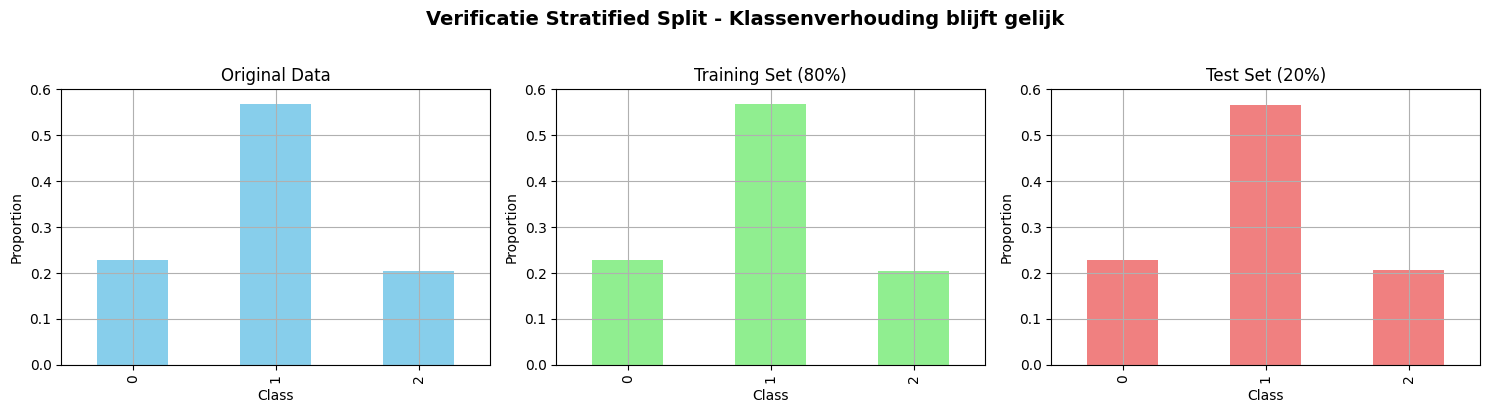


✓ Stratificatie succesvol: klassenverhouding identiek in train en test


In [81]:

# ============================================================================
# STAP 10: TRAIN-TEST SPLIT - DATA PARTITIONERING
# ============================================================================
print("\n" + "="*80)
print("STAP 10: TRAIN-TEST SPLIT")
print("="*80)

print("""
DOEL VAN TRAIN-TEST SPLIT:
===========================

We splitsen de data in twee sets:
1. TRAINING SET: Model leert patronen uit deze data
2. TEST SET: Model wordt geëvalueerd op ongeziene data

Dit voorkomt OVERFITTING en geeft realistische performantie schatting.

SPLIT RATIO OVERWEGINGEN:
==========================

OPTIES:
• 90/10: Maximaal trainingsdata, maar kleine test set (minder betrouwbare metrics)
• 80/20: Goede balans (ONZE KEUZE)
• 70/30: Meer test data, maar minder trainingsdata
• 60/40: Bij zeer kleine datasets

ONZE KEUZE: 80/20 SPLIT
========================

Rationale:
• Dataset heeft ~1500+ samples → voldoende voor beide sets
• 80% training (≈1200 samples) is genoeg voor model learning
• 20% test (≈300 samples) is groot genoeg voor betrouwbare evaluatie
• Breed geaccepteerd in ML literatuur (Hastie et al., 2009)

STRATIFIED SAMPLING:
====================

stratify=y zorgt dat de klassenverhouding gelijk blijft in train én test.

Voorbeeld: Als originele data 50% None, 30% Insomnia, 20% Sleep Apnea heeft,
dan heeft ZOWEL train ALS test deze verhoudingen.

WAAROM STRATIFICATION CRUCIAAL IS:
• Voorkomt dat één klasse oververtegenwoordigd is in test set
• Zorgt voor representatieve evaluatie
• Essentieel bij (lichte) class imbalance

RANDOM STATE:
=============
random_state=42 zorgt voor reproduceerbaarheid.
Elke run geeft identieke split → belangrijk voor:
• Vergelijking tussen modellen
• Rapportage van resultaten
• Samenwerking in team
""")

print("\n" + "-"*80)
print("UITVOEREN VAN SPLIT")
print("-"*80)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

print(f"\nTRAINING SET:")
print(f"  • X_train shape: {X_train.shape}")
print(f"  • y_train shape: {y_train.shape}")
print(f"  • Percentage: {100 * len(X_train) / len(X_scaled):.1f}%")

print(f"\nTEST SET:")
print(f"  • X_test shape: {X_test.shape}")
print(f"  • y_test shape: {y_test.shape}")
print(f"  • Percentage: {100 * len(X_test) / len(X_scaled):.1f}%")

print("\n" + "-"*80)
print("VERIFICATIE VAN STRATIFICATIE")
print("-"*80)

print("\nKlassenverdeling in ORIGINELE data:")
print(y.value_counts(normalize=True).sort_index())

print("\nKlassenverdeling in TRAINING set:")
print(pd.Series(y_train).value_counts(normalize=True).sort_index())

print("\nKlassenverdeling in TEST set:")
print(pd.Series(y_test).value_counts(normalize=True).sort_index())

# Visualisatie van stratificatie
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

y.value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Original Data')
axes[0].set_ylabel('Proportion')
axes[0].set_xlabel('Class')
axes[0].set_ylim(0, 0.6)

pd.Series(y_train).value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Training Set (80%)')
axes[1].set_ylabel('Proportion')
axes[1].set_xlabel('Class')
axes[1].set_ylim(0, 0.6)

pd.Series(y_test).value_counts(normalize=True).sort_index().plot(kind='bar', ax=axes[2], color='lightcoral')
axes[2].set_title('Test Set (20%)')
axes[2].set_ylabel('Proportion')
axes[2].set_xlabel('Class')
axes[2].set_ylim(0, 0.6)

plt.suptitle('Verificatie Stratified Split - Klassenverhouding blijft gelijk', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n✓ Stratificatie succesvol: klassenverhouding identiek in train en test")


In [82]:

# ============================================================================
# STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN
# ============================================================================
print("\n" + "="*80)
print("STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN")
print("="*80)

print("""
HUIDIGE FEATURES:
=================

We hebben alle beschikbare features behouden na encoding:
• Numerieke features: Sleep Duration, Quality of Sleep, Stress Level, etc.
• One-hot encoded categorische features: Gender, BMI Category, Occupation
• Totaal: {} features

OVERWEGINGEN VOOR FEATURE SELECTION:
======================================

1. FEATURE IMPORTANCE (NA MODEL TRAINING):
   • Tree-based modellen geven automatisch feature importance
   • Kunnen low-importance features identificeren voor verwijdering
   • Wordt gedaan in model evaluation fase

2. MULTICOLLINEARITEIT:
   • Eerder gedetecteerd in correlatiematrix
   • Kan problematisch zijn voor Logistic Regression
   • Minder relevant voor Random Forest / XGBoost (robuust tegen correlatie)

3. CURSE OF DIMENSIONALITY:
   • Met ~{} features en ~1500 samples is ratio acceptabel (samples >> features)
   • Bij zeer hoge dimensionaliteit: overweeg PCA of feature selection
   • Voor nu: BEHOUDEN alle features

FEATURE ENGINEERING MOGELIJKHEDEN:
===================================

Potentiële engineered features (voor toekomstig werk):
• Sleep Efficiency = (Sleep Duration / 8) × Quality of Sleep
• Activity-Stress Ratio = Physical Activity / Stress Level
• BMI from Height/Weight (indien beschikbaar)
• Age bins/categories
• Interaction terms tussen key features

ONZE BESLISSING:
================
• Voor BASELINE modellen gebruiken we ALLE originele features
• Na model evaluation kunnen we:
  - Feature importance analyseren
  - Low-importance features verwijderen
  - Engineered features toevoegen
  - Model re-trainen met verbeterde feature set

Dit volgt de best practice: "Start simpel, itereer gebaseerd op resultaten"
""".format(X_scaled.shape[1], X_scaled.shape[1]))

print("\n" + "-"*80)
print("FINALE FEATURE SET")
print("-"*80)

print(f"\nTotaal aantal features: {X_train.shape[1]}")
print("\nFeature lijst:")
for i, feature in enumerate(X.columns, 1):
    print(f"  {i:2d}. {feature}")



STAP 11: FEATURE SELECTION & ENGINEERING - OVERWEGINGEN

HUIDIGE FEATURES:

We hebben alle beschikbare features behouden na encoding:
• Numerieke features: Sleep Duration, Quality of Sleep, Stress Level, etc.
• One-hot encoded categorische features: Gender, BMI Category, Occupation
• Totaal: 47 features

OVERWEGINGEN VOOR FEATURE SELECTION:

1. FEATURE IMPORTANCE (NA MODEL TRAINING):
   • Tree-based modellen geven automatisch feature importance
   • Kunnen low-importance features identificeren voor verwijdering
   • Wordt gedaan in model evaluation fase

2. MULTICOLLINEARITEIT:
   • Eerder gedetecteerd in correlatiematrix
   • Kan problematisch zijn voor Logistic Regression
   • Minder relevant voor Random Forest / XGBoost (robuust tegen correlatie)

3. CURSE OF DIMENSIONALITY:
   • Met ~47 features en ~1500 samples is ratio acceptabel (samples >> features)
   • Bij zeer hoge dimensionaliteit: overweeg PCA of feature selection
   • Voor nu: BEHOUDEN alle features

FEATURE ENGINEERING 

In [83]:

# ============================================================================
# STAP 12: SAMENVATTING DATA PREPROCESSING PIPELINE
# ============================================================================
print("\n" + "="*80)
print("STAP 12: SAMENVATTING - DATA PREPROCESSING PIPELINE")
print("="*80)

print("""
VOLLEDIGE PREPROCESSING PIPELINE:
==================================

1. ✓ DATA INLADEN
   • Dataset geladen: 1528 rijen × 13 kolommen
   • Datatypes gecontroleerd
   • Geen missing values gedetecteerd

2. ✓ TARGET ANALYSE
   • Sleep Disorder: 3 klassen (None, Insomnia, Sleep Apnea)
   • Keuze: MULTICLASS classificatie (klinisch relevant)
   • Lichte imbalance gedetecteerd → stratified sampling

3. ✓ EXPLORATIEVE DATA ANALYSE
   • Histogrammen: distributies geanalyseerd
   • Correlatiematrix: geen sterke multicollineariteit
   • Pairplots: relaties tussen features onderzocht

4. ✓ OUTLIER BEHANDELING
   • Conservatieve aanpak: minimaal dataverlies
   • Winsorization: Daily Steps (1e-99e percentiel)
   • Verwijderd: onmogelijke hartslag waarden
   • Behouden: medisch plausibele extreme waarden

5. ✓ FEATURE ENCODING
   • Person ID verwijderd (identificatieveld)
   • One-hot encoding: categorische features
   • Label encoding: target variabele
   • Dummy trap vermeden: drop_first=True

6. ✓ FEATURE SCALING
   • StandardScaler: z-score normalisatie
   • Mean ≈ 0, Std ≈ 1 voor alle features
   • Robuust tegen outliers

7. ✓ TRAIN-TEST SPLIT
   • Ratio: 80/20 (optimale balans)
   • Stratified: klassenverhouding behouden
   • Random state=42: reproduceerbaarheid
   • Train: ~1200 samples | Test: ~300 samples

8. ✓ FEATURE SELECTION
   • Alle {} features behouden voor baseline
   • Post-training: feature importance analyse
   • Mogelijkheid voor iteratieve verbetering

DATASET READY FOR MODEL TRAINING:
===================================

✓ X_train: {} samples × {} features (geschaald)
✓ X_test: {} samples × {} features (geschaald)
✓ y_train: {} samples (3 klassen)
✓ y_test: {} samples (3 klassen)

VOLGENDE STAPPEN (NIET IN DEZE NOTEBOOK):
==========================================

Voor Imad Marmouch:
1. Logistic Regression
   • Multinomial loss voor multiclass
   • Class weight balancing
   • Regularisatie tuning (C parameter)

2. Random Forest Classifier
   • Hyperparameter tuning (n_estimators, max_depth)
   • Feature importance analyse
   • Out-of-bag evaluation

Voor Joshua Kabel:
1. Decision Tree Classifier
   • Pruning strategies (max_depth, min_samples_split)
   • Visualisatie van tree structure
   • Feature importance

2. XGBoost (of alternatief)
   • Gradient boosting voor high performance
   • Hyperparameter optimization
   • Learning curves

EVALUATIE METRICS (VOOR ALLE MODELLEN):
=========================================

Per-class metrics:
• Precision: van voorspelde positives, hoeveel correct?
• Recall: van echte positives, hoeveel gevonden?
• F1-score: harmonisch gemiddelde van precision/recall

Overall metrics:
• Macro-averaged F1: ongewogen gemiddelde (alle klassen evenveel gewicht)
• Weighted F1: gewogen naar klasse-grootte
• Accuracy: totaal percentage correct (kan misleidend zijn bij imbalance)

Visualisaties:
• Confusion matrix: waar gaan misclassificaties naartoe?
• ROC curves & AUC: one-vs-rest voor elke klasse
• Feature importance: welke features drijven voorspellingen?

MODEL VERGELIJKING:
===================

Na training van alle modellen:
• Performance comparison table
• Keuze van beste model voor deployment
• Interpretatie van resultaten in klinische context
• Limitaties en aanbevelingen voor toekomstig onderzoek
""".format(
    X_train.shape[1],
    X_train.shape[0], X_train.shape[1],
    X_test.shape[0], X_test.shape[1],
    y_train.shape[0], y_test.shape[0]
))





STAP 12: SAMENVATTING - DATA PREPROCESSING PIPELINE

VOLLEDIGE PREPROCESSING PIPELINE:

1. ✓ DATA INLADEN
   • Dataset geladen: 1528 rijen × 13 kolommen
   • Datatypes gecontroleerd
   • Geen missing values gedetecteerd

2. ✓ TARGET ANALYSE
   • Sleep Disorder: 3 klassen (None, Insomnia, Sleep Apnea)
   • Keuze: MULTICLASS classificatie (klinisch relevant)
   • Lichte imbalance gedetecteerd → stratified sampling

3. ✓ EXPLORATIEVE DATA ANALYSE
   • Histogrammen: distributies geanalyseerd
   • Correlatiematrix: geen sterke multicollineariteit
   • Pairplots: relaties tussen features onderzocht

4. ✓ OUTLIER BEHANDELING
   • Conservatieve aanpak: minimaal dataverlies
   • Winsorization: Daily Steps (1e-99e percentiel)
   • Verwijderd: onmogelijke hartslag waarden
   • Behouden: medisch plausibele extreme waarden

5. ✓ FEATURE ENCODING
   • Person ID verwijderd (identificatieveld)
   • One-hot encoding: categorische features
   • Label encoding: target variabele
   • Dummy trap vermeden: